In [1]:
import gpxpy
import gpxpy.gpx
import json

# Funkcja do konwersji punktów trasy na JSON
def convert_track_to_json(gpx_track):
    track_points = []
    for segment in gpx_track.segments:
        for point in segment.points:
            track_points.append({'lat': point.latitude, 'lng': point.longitude})
    return track_points

# Funkcja do konwersji waypointów na JSON
def convert_waypoints_to_json(gpx_waypoints):
    waypoints = []
    for waypoint in gpx_waypoints:
        waypoints.append({'id': waypoint.name, 'lat': waypoint.latitude, 'lng': waypoint.longitude})
    return waypoints

# Otwórz plik GPX i przetwórz go
with open('mik_giz_1.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

    # Przetwórz trasy (tracks)
    tracks_data = []
    for track in gpx.tracks:
        tracks_data.extend(convert_track_to_json(track))

    # Przetwórz waypointy
    waypoints_data = convert_waypoints_to_json(gpx.waypoints)

    # Zapisz dane trasy do JSON
    with open('route.json', 'w') as json_file:
        json.dump(tracks_data, json_file, indent=4)

    # Zapisz dane waypointów do JSON
    with open('waypoints.json', 'w') as json_file:
        json.dump(waypoints_data, json_file, indent=4)

print("Dane trasy i waypointów zostały zapisane do plików JSON.")

Dane trasy i waypointów zostały zapisane do plików JSON.


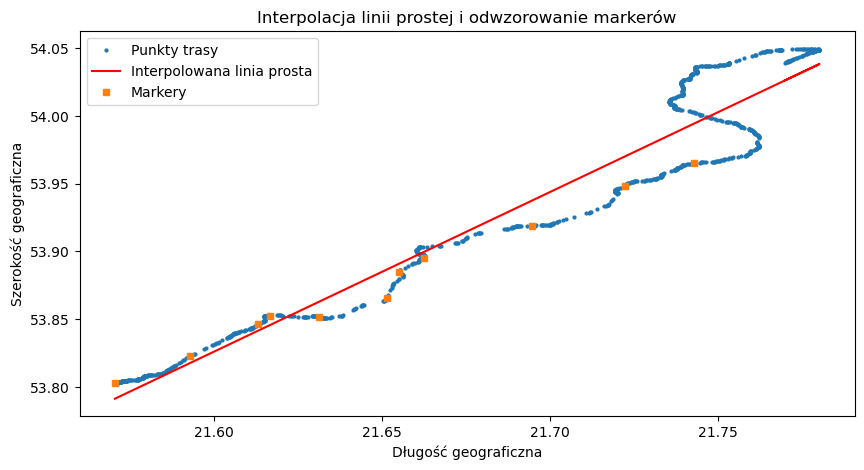

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Załaduj dane trasy
with open('route.json', 'r') as file:
    route_data = json.load(file)

# Załaduj dane markerów
with open('waypoints.json', 'r') as file:
    marker_data = json.load(file)

# Przygotuj listy współrzędnych X i Y dla trasy
x_route = [point['lng'] for point in route_data]
y_route = [point['lat'] for point in route_data]

# Przygotuj listy współrzędnych X i Y dla markerów
x_markers = [point['lng'] for point in marker_data]
y_markers = [point['lat'] for point in marker_data]

# Oblicz współczynniki prostej interpolującej (liniowej regresji)
A = np.vstack([x_route, np.ones(len(x_route))]).T
m, c = np.linalg.lstsq(A, y_route, rcond=None)[0]

# Oblicz wartości Y na linii prostej dla X z trasy
y_line = m * np.array(x_route) + c

# Wizualizacja
plt.figure(figsize=(10, 5))

# Rysuj trasę
plt.plot(x_route, y_route, 'o', label='Punkty trasy', markersize=2)

# Rysuj linię prostą
plt.plot(x_route, y_line, 'r', label='Interpolowana linia prosta')

# Rysuj markery
plt.plot(x_markers, y_markers, 's', label='Markery', markersize=5)

# Dodaj legendę
plt.legend()

# Dodaj tytuł i etykiety osi
plt.title('Interpolacja linii prostej i odwzorowanie markerów')
plt.xlabel('Długość geograficzna')
plt.ylabel('Szerokość geograficzna')

# Pokaż wykres
plt.show()


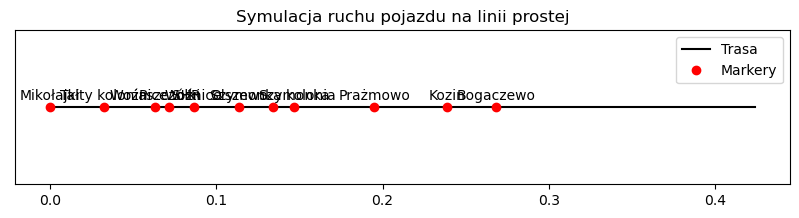

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Załaduj dane trasy
with open('route.json', 'r') as file:
    route_data = json.load(file)

# Załaduj dane markerów
with open('waypoints.json', 'r') as file:
    marker_data = json.load(file)

# Oblicz odległości punktów trasy od początkowego punktu
distances = [0]  # pierwszy punkt ma odległość 0
for i in range(1, len(route_data)):
    prev_point = route_data[i - 1]
    curr_point = route_data[i]
    segment_length = np.sqrt((curr_point['lng'] - prev_point['lng'])**2 + (curr_point['lat'] - prev_point['lat'])**2)
    distances.append(distances[-1] + segment_length)

# Oblicz odległości markerów od początkowego punktu
marker_distances = []
for marker in marker_data:
    closest_point = min(route_data, key=lambda p: (p['lng'] - marker['lng'])**2 + (p['lat'] - marker['lat'])**2)
    closest_index = route_data.index(closest_point)
    marker_distances.append(distances[closest_index])

# Wizualizacja
plt.figure(figsize=(10, 2))

# Rysuj linię prostą (trasę)
plt.plot(distances, np.zeros_like(distances), 'k-', label='Trasa')

# Rysuj markery
plt.plot(marker_distances, np.zeros_like(marker_distances), 'ro', label='Markery')

# Dodaj etykiety markerów
for i, marker in enumerate(marker_data):
    plt.text(marker_distances[i], 0.01, marker['id'], ha='center')

# Usuń osie Y i ustaw limity dla lepszej wizualizacji
plt.yticks([])
plt.ylim(-0.1, 0.1)

# Dodaj legendę i tytuł
plt.legend()
plt.title('Symulacja ruchu pojazdu na linii prostej')

# Pokaż wykres
plt.show()


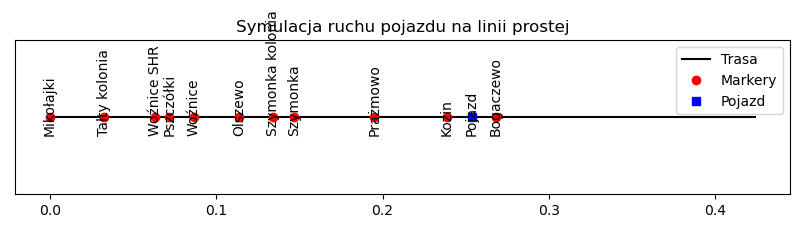

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Załaduj dane trasy
with open('route.json', 'r') as file:
    route_data = json.load(file)

# Załaduj dane markerów
with open('waypoints.json', 'r') as file:
    marker_data = json.load(file)

# Współrzędne testowego markera pojazdu
test_vehicle_location = {'lat': 53.956234, 'lng': 21.732951}  # Przykładowe współrzędne

# Oblicz odległości punktów trasy od początkowego punktu
distances = [0]  # pierwszy punkt ma odległość 0
for i in range(1, len(route_data)):
    prev_point = route_data[i - 1]
    curr_point = route_data[i]
    segment_length = np.sqrt((curr_point['lng'] - prev_point['lng'])**2 + (curr_point['lat'] - prev_point['lat'])**2)
    distances.append(distances[-1] + segment_length)

# Oblicz odległości markerów od początkowego punktu
marker_distances = []
for marker in marker_data:
    closest_point = min(route_data, key=lambda p: (p['lng'] - marker['lng'])**2 + (p['lat'] - marker['lat'])**2)
    closest_index = route_data.index(closest_point)
    marker_distances.append(distances[closest_index])

# Oblicz pozycję testowego markera pojazdu
closest_point_to_vehicle = min(route_data, key=lambda p: (p['lng'] - test_vehicle_location['lng'])**2 + (p['lat'] - test_vehicle_location['lat'])**2)
vehicle_index = route_data.index(closest_point_to_vehicle)
vehicle_distance = distances[vehicle_index]

# Wizualizacja
plt.figure(figsize=(10, 2))

# Rysuj linię prostą (trasę)
plt.plot(distances, np.zeros_like(distances), 'k-', label='Trasa')

# Rysuj markery
plt.plot(marker_distances, np.zeros_like(marker_distances), 'ro', label='Markery')

# Rysuj testowy marker pojazdu
plt.plot(vehicle_distance, 0, 'bs', label='Pojazd')

# Dodaj etykiety markerów obrócone o 90 stopni i umieszczone poniżej markerów
for i, marker in enumerate(marker_data):
    plt.text(marker_distances[i], -0.02, marker['id'], ha='center', rotation=90)

# Dodaj etykietę dla testowego markera pojazdu
plt.text(vehicle_distance, -0.02, 'Pojazd', ha='center', rotation=90)

# Usuń osie Y i ustaw limity dla lepszej wizualizacji
plt.yticks([])
plt.ylim(-0.1, 0.1)

# Dodaj legendę i tytuł
plt.legend()
plt.title('Symulacja ruchu pojazdu na linii prostej')

# Pokaż wykres
plt.show()
